In [2]:
import numpy as np
import pandas as pd
import biosignalsnotebooks as bsnb
import neurokit2 as nk
import seaborn as sns

from scipy import signal
from matplotlib import pyplot as plt
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.models import BoxAnnotation
from bokeh.io import output_notebook

import biosignalsnotebooks as bsnb
from biosignalsnotebooks.visualise import plot, opensignals_kwargs, opensignals_style, opensignals_color_pallet

import sys
import biosignal_processing_package as rndSignal

# settings
sns.set()
output_notebook(hide_banner=True)

In [3]:
# temporary function for plotting signals
def plot_signal(clean_signal, label = None):
    t = np.linspace(0, len(clean_signal), len(clean_signal))
    plt.plot(t, clean_signal, label = label)
    plt.legend(title="window length")

# simulate data

In [4]:
# regular ppg signal
p1_signal_ppg = nk.ppg_simulate(
                duration = 120,
                sampling_rate = 200,
                heart_rate = 60)
# Noisy ppg signal
p2_signal_ppg = nk.ppg_simulate(
                duration = 120,
                sampling_rate = 200,
                heart_rate = 60,
                ibi_randomness = 0.5,
                drift = 0.5,
                motion_amplitude = 0.8,
                powerline_amplitude = 0.1,
                burst_amplitude = 0.4)
# regular ecg signal
p1_signal_ecg = nk.ecg_simulate(
                duration = 120,
                sampling_rate = 200,
                heart_rate = 60)
# Noisy ecg signal
p2_signal_ecg = nk.ecg_simulate(
                duration = 120,
                sampling_rate = 200,
                heart_rate = 60,
                noise = 0.1)

# ppg

In [5]:
# variable assignment
fs = 200
sig_raw = p1_signal_ppg
sig_clean = rndSignal.filter_ppg(p1_signal_ppg, fs=fs)
f1 = 0.5
f2 = 4

/opt/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


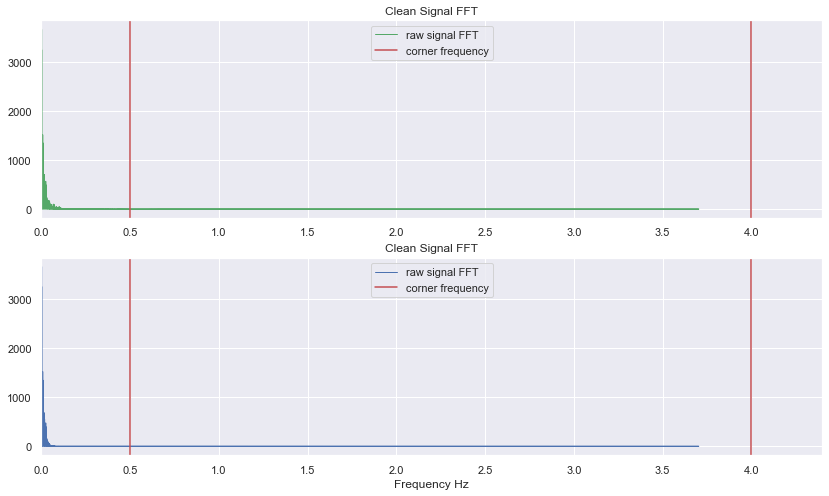

In [8]:
fft_raw = np.abs(np.fft.fft(sig_raw - np.mean(sig_raw)))
fft_clean = np.abs(np.fft.fft(sig_clean - np.mean(sig_clean)))

fs = np.fft.fftshift(np.fft.fftfreq(len(sig_raw),d=1/fs))

fft_raw = np.fft.fftshift(fft_raw)
fft_clean = np.fft.fftshift(fft_clean)

plt.figure(figsize=(14,8))
plt.subplot(211)
plt.plot(fs, fft_raw, linewidth=1, c='g', label="raw signal FFT")
plt.xlim(0,f2*1.1)
plt.title("Clean Signal FFT")
plt.axvline(x=f1, c='r', label="corner frequency")
plt.axvline(x=f2, c='r')
plt.legend()

plt.subplot(212)
plt.plot(fs, fft_clean, linewidth=1, c='b', label="raw signal FFT")
plt.xlim(0,f2*1.1)
plt.xlabel("Frequency Hz")
plt.title("Clean Signal FFT")
plt.axvline(x=f1, c='r', label="corner frequency")
plt.axvline(x=f2, c='r')
plt.legend()
plt.show()

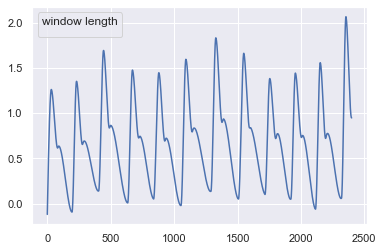

In [10]:
plot_signal(sig_raw[:2400])

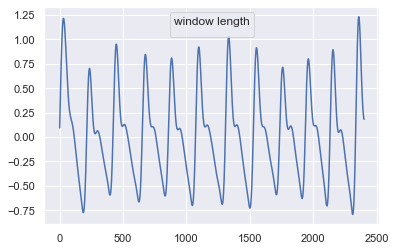

In [11]:
plot_signal(sig_clean[:2400])

# ecg

In [12]:
# variable assignment
fs = 200
sig_raw = p1_signal_ecg
sig_clean = rndSignal.filter_ecg(p1_signal_ecg, fs=fs)
f1 = 0.5
f2 = 40

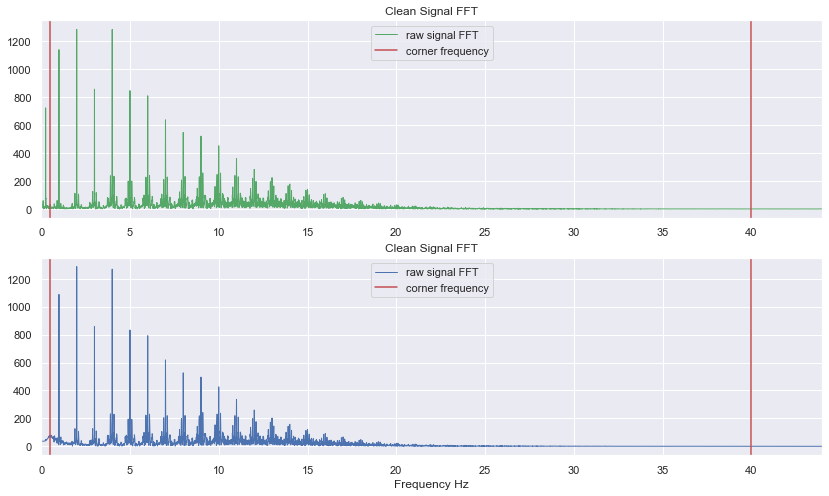

In [13]:
fft_raw = np.abs(np.fft.fft(sig_raw - np.mean(sig_raw)))
fft_clean = np.abs(np.fft.fft(sig_clean - np.mean(sig_clean)))

fs = np.fft.fftshift(np.fft.fftfreq(len(sig_raw),d=1/fs))

fft_raw = np.fft.fftshift(fft_raw)
fft_clean = np.fft.fftshift(fft_clean)

plt.figure(figsize=(14,8))
plt.subplot(211)
plt.plot(fs, fft_raw, linewidth=1, c='g', label="raw signal FFT")
plt.xlim(0,f2*1.1)
plt.title("Clean Signal FFT")
plt.axvline(x=f1, c='r', label="corner frequency")
plt.axvline(x=f2, c='r')
plt.legend()

plt.subplot(212)
plt.plot(fs, fft_clean, linewidth=1, c='b', label="raw signal FFT")
plt.xlim(0,f2*1.1)
plt.xlabel("Frequency Hz")
plt.title("Clean Signal FFT")
plt.axvline(x=f1, c='r', label="corner frequency")
plt.axvline(x=f2, c='r')
plt.legend()
plt.show()

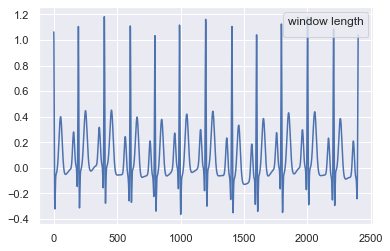

In [14]:
plot_signal(sig_raw[:2400])

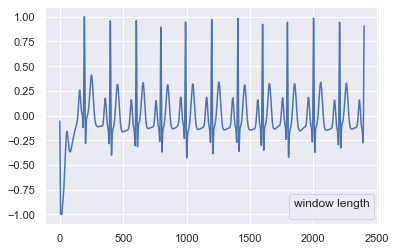

In [15]:
plot_signal(sig_clean[:2400])

# functionalize

In [16]:
def fft_graph(sig_raw, sig_clean, fs, f1, f2):
    fft_raw = np.abs(np.fft.fft(sig_raw - np.mean(sig_raw)))
    fft_clean = np.abs(np.fft.fft(sig_clean - np.mean(sig_clean)))

    fs = np.fft.fftshift(np.fft.fftfreq(len(sig_raw),d=1/fs))

    fft_raw = np.fft.fftshift(fft_raw)
    fft_clean = np.fft.fftshift(fft_clean)

    plt.figure(figsize=(14,8))
    plt.subplot(211)
    plt.plot(fs, fft_raw, linewidth=1, c='g', label="raw signal FFT")
    plt.xlim(0,f2*1.1)
    plt.title("Clean Signal FFT")
    plt.axvline(x=f1, c='r', label="corner frequency")
    plt.axvline(x=f2, c='r')
    plt.legend()

    plt.subplot(212)
    plt.plot(fs, fft_clean, linewidth=1, c='b', label="raw signal FFT")
    plt.xlim(0,f2*1.1)
    plt.xlabel("Frequency Hz")
    plt.title("Clean Signal FFT")
    plt.axvline(x=f1, c='r', label="corner frequency")
    plt.axvline(x=f2, c='r')
    plt.legend()
    plt.show()

# Bokeh Plotting

In [17]:
def fft_graph(sig_raw, sig_clean, fs, f1, f2): # bokeh plotting
    """
    Supplementary function that plots the Fast Fourier Transform (FFT) of the raw and clean signals.
    Additionally, the corner frequencies of the filter applied to the clean signal is shown.
    
    ----------
    Parameters
    ----------
    sig_raw (array-like) - raw signal
    sig_clean (string) - clean signal
    fs (int) - sampling rate of the signals
    f1 (float) - high-pass filter cut-off
    f2 (float) - low-pass filter cut-off
    ----------
    Returns
    ----------
    denoised (array-like) - denoised signal
    """
    fft_raw = np.abs(np.fft.fft(sig_raw - np.mean(sig_raw)))
    fft_clean = np.abs(np.fft.fft(sig_clean - np.mean(sig_clean)))

    freq_arr = np.fft.fftshift(np.fft.fftfreq(len(sig_raw),d=1/fs))
    idx = np.where(freq_arr == 0)[0][0]
    freq_arr = freq_arr[idx:]
    fft_raw = np.fft.fftshift(fft_raw)
    fft_clean = np.fft.fftshift(fft_clean)
    fft_raw = fft_raw[idx:]
    fft_clean = fft_clean[idx:]

    fig_list = []
    list_figures_raw = []
    list_figures_clean = []
    list_figures_raw.append(
        figure(
            x_range=(0, f2*1.1),
            title="Raw Signal", 
            x_axis_label = 'Frequency (Hz)', 
            **bsnb.opensignals_kwargs("figure")
        )
    )
    list_figures_clean.append(
        figure(x_range=(0, f2*1.1),
        title="Clean Signal",
        x_axis_label = 'Frequency (Hz)', 
        **bsnb.opensignals_kwargs("figure")
        )
    )
    list_figures_raw[-1].line(freq_arr,fft_raw,**bsnb.opensignals_kwargs("line"))
    list_figures_clean[-1].line(freq_arr,fft_clean,**bsnb.opensignals_kwargs("line"))
    box_annotation = BoxAnnotation(left = f1, right = f2, fill_color = 'red', fill_alpha = 0.1)
    list_figures_raw[-1].add_layout(box_annotation)
    list_figures_clean[-1].add_layout(box_annotation)  

    bsnb.opensignals_style(list_figures_raw, toolbar = "above")
    bsnb.opensignals_style(list_figures_clean, toolbar = "above")

    grid = gridplot([list_figures_raw,list_figures_clean],toolbar_location='above', **bsnb.opensignals_kwargs("gridplot"))
    show(grid)

In [18]:
# variable assignment
fs = 200
sig_raw = p1_signal_ecg
sig_clean = rndSignal.filter_ecg(p1_signal_ecg, fs=fs)
f1 = 0.5
f2 = 40

In [19]:
fft_graph(sig_raw, sig_clean, fs, f1, f2)

# single bokeh graph

In [20]:
def fft_graph(sig, fs): # bokeh plotting
    """
    Function that plots the Fast Fourier Transform (FFT) of a given signal.
    
    ----------
    Parameters
    ----------
    sig (array-like) - signal
    fs (int) - sampling rate of the signals

    ----------
    Returns
    ----------
    None
    """
    fft_sig = np.abs(np.fft.fft(sig - np.mean(sig)))
    freq_arr = np.fft.fftshift(np.fft.fftfreq(len(sig),d=1/fs))
    idx = np.where(freq_arr == 0)[0][0]
    freq_arr = freq_arr[idx:]
    fft_sig = np.fft.fftshift(fft_sig)
    fft_sig = fft_sig[idx:]

    fig_list = []
    list_figures= []
    list_figures.append(
        figure(
            x_range=(0, f2*1.1),
            title="Signal FFT", 
            x_axis_label = 'Frequency (Hz)', 
            **bsnb.opensignals_kwargs("figure")
        )
    )

    list_figures[-1].line(freq_arr,fft_sig,**bsnb.opensignals_kwargs("line"))
    bsnb.opensignals_style(list_figures, toolbar = "above")
    grid = gridplot([list_figures],toolbar_location='above', **bsnb.opensignals_kwargs("gridplot"))
    show(grid)

In [21]:
# variable assignment
fs = 200
sig = p1_signal_ecg
f1 = 0.5
f2 = 40

In [22]:
fft_graph(sig_raw, fs)

In [23]:
rndSignal.filter_ecg(sig, fs, display_fft=True)

array([-0.0557492 , -0.17770742, -0.33381008, ...,  0.41777912,
        0.17327109, -0.09453474])